# Q-Learning Demo

In [1]:
import sys
sys.path.insert(1, '../')

In [2]:
import warnings
import gym, gym_walk
from q_learning import q_learning
from utils.common_utils import (evaluate_policy, print_policy_success_stats,
                                plot_state_value_function, plot_policy, rmse,
                                print_action_value_function, get_policy_metrics)
from value_iteration.value_iteration import value_iteration
warnings.filterwarnings('ignore')

In [3]:
env = gym.make('RandomWalk-v0')
init_state = env.reset()
goal_state = 6
gamma = 1.0  # Episodic
n_episodes = 500
P = env.env.P

LEFT, RIGHT = range(2)
pi = lambda s: {
    0: LEFT, 1: LEFT, 2: LEFT, 3: LEFT, 4: LEFT, 5: LEFT, 6: LEFT
}[s]
action_symbols = ['<', '>']
row, col = 1, 7

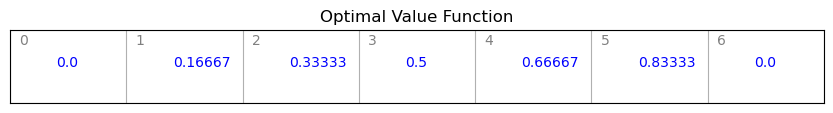

By using the Policy, success rate to reach goal is: 53.00%
By using the Policy, mean reward is: 0.4100


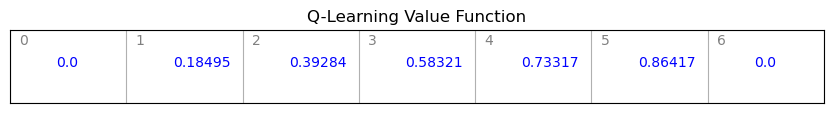

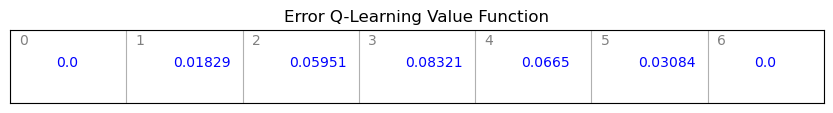

RMSE: 0.0481
+-------+-------+-------+
| state |   <   |   >   |
+-------+-------+-------+
|  0.0  |  0.0  |  0.0  |
|  1.0  | 0.185 | 0.173 |
|  2.0  | 0.365 | 0.393 |
|  3.0  | 0.532 | 0.583 |
|  4.0  | 0.733 | 0.709 |
|  5.0  | 0.852 | 0.864 |
|  6.0  |  0.0  |  0.0  |
+-------+-------+-------+
Action-value function RMSE: 0.0382


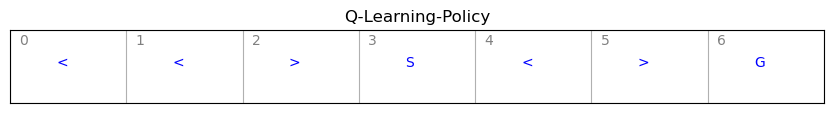

By using the Policy, success rate to reach goal is: 53.00%
By using the Policy, mean reward is: 0.4900


In [4]:
optimal_Q, optimal_V, optimal_pi = value_iteration(P, gamma)
plot_state_value_function(row, col, optimal_V, 'Optimal Value Function')
print_policy_success_stats(env, optimal_pi, goal_state=goal_state, gamma=gamma)

Q_ql, V_ql, pi_ql = q_learning(env, gamma=gamma, n_episodes=n_episodes)
plot_state_value_function(row, col, V_ql, 'Q-Learning Value Function')
plot_state_value_function(row, col, V_ql - optimal_V, 'Error Q-Learning Value Function')

print('RMSE:', rmse(V_ql, optimal_V))

print_action_value_function(Q_ql, action_symbols)
print('Action-value function RMSE: {}'.format(rmse(Q_ql, optimal_Q)))
plot_policy(pi_ql, P, row, col, 'Q-Learning-Policy', action_symbols, init_state, goal_state)
print_policy_success_stats(env, pi_ql, goal_state=goal_state, gamma=gamma)